# Lab 1. Node embeddings

In [1]:
import networkx as nx
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.optim import SGD
import random

## 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∑–∞–¥–∞—á –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π –≤–æ–∑—å–º–µ–º –≥—Ä–∞—Ñ Karate Club Network, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –∫—Ç–æ –∏–∑ —É—á–µ–Ω–∏–∫–æ–≤ –æ–±—â–∞–µ—Ç—Å—è –≤–Ω–µ –∑–∞–Ω—è—Ç–∏–π. –ü–æ—Å–ª–µ –∫–æ–Ω—Ñ–ª–∏–∫—Ç–∞ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä–∞ –∏ –∏–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä–∞ —Ç–∞–∫–æ–π –≥—Ä–∞—Ñ –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è —É—á–µ–Ω–∏–∫–æ–≤ –Ω–∞ –¥–≤–∞ –Ω–æ–≤—ã—Ö –∫–ª—É–±–∞.

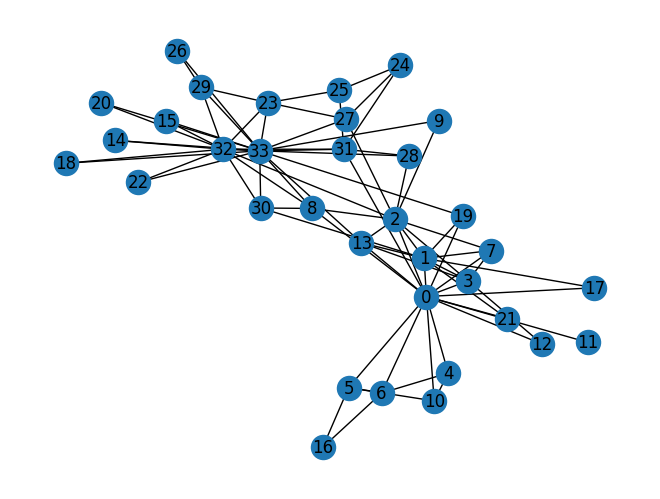

In [2]:
G = nx.karate_club_graph()
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –≥—Ä–∞—Ñ
nx.draw(G, with_labels = True)

In [3]:
def graph_to_edge_list(G):
    # –§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –≥—Ä–∞—Ñ G –≤ —Å–ø–∏—Å–æ–∫ —Ä—ë–±–µ—Ä.
    # –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Ä—ë–±–µ—Ä –≥—Ä–∞—Ñ–∞ –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ –∫–æ—Ä—Ç–µ–∂–µ–π (edge_list).
    return list(G.edges())

def edge_list_to_tensor(edge_list):
    # –§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç edge_list –≤ —Ç–µ–Ω–∑–æ—Ä.
    # –í—Ö–æ–¥–Ω–æ–π edge_list –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂–µ–π, –∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —è–≤–ª—è–µ—Ç—Å—è —Ç–µ–Ω–∑–æ—Ä —Ñ–æ—Ä–º—ã [2, len(edge_list)].

    # –°–æ–∑–¥–∞—ë–º —Ç–µ–Ω–∑–æ—Ä –∏–∑ —Å–ø–∏—Å–∫–∞ —Ä—ë–±–µ—Ä –∏ –º–µ–Ω—è–µ–º –µ–≥–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é permute, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –Ω—É–∂–Ω—É—é —Ñ–æ—Ä–º—É [2, num_edges].
    edge_index = torch.tensor(edge_list, dtype=torch.long).permute((1, 0))

    return edge_index

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≥—Ä–∞—Ñ –≤ —Å–ø–∏—Å–æ–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä
pos_edge_list = graph_to_edge_list(G)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å–ø–∏—Å–æ–∫ —Ä—ë–±–µ—Ä –≤ —Ç–µ–Ω–∑–æ—Ä
pos_edge_index = edge_list_to_tensor(pos_edge_list)

# –í—ã–≤–æ–¥–∏–º —Ñ–æ—Ä–º—É –∏ —Å—É–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ–Ω–∑–æ—Ä–∞ —Ä—ë–±–µ—Ä
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))


The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [4]:
def sample_negative_edges(G, num_neg_samples):
    # –§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç —Å–ø–∏—Å–æ–∫ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä.
    # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä –∑–∞–¥–∞—ë—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º num_neg_samples.

    neg_edge_list = []  # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä

    pos_set = set(G.edges())  # –°–æ–∑–¥–∞—ë–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä –¥–ª—è –±—ã—Å—Ç—Ä–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏

    while len(neg_edge_list) < num_neg_samples:
        # –í—ã–±–∏—Ä–∞–µ–º –¥–≤–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ—Ä—à–∏–Ω—ã –∏–∑ –≥—Ä–∞—Ñ–∞
        random_pair = np.random.choice(G.nodes(), 2)
        u, v = random_pair[0], random_pair[1]

        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –≤—ã–±—Ä–∞–Ω–Ω—ã–µ –≤–µ—Ä—à–∏–Ω—ã –Ω–µ –æ–±—Ä–∞–∑—É—é—Ç –ø–µ—Ç–ª—é –∏ —á—Ç–æ —Ä—ë–±—Ä–∞ (u, v) –∏ (v, u) –Ω–µ —è–≤–ª—è—é—Ç—Å—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä—ë–±—Ä–∞–º–∏
        if u == v or (u, v) in pos_set or (v, u) in pos_set:
            continue
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —Ä—ë–±—Ä–∞ (u, v) –∏ (v, u) –µ—â—ë –Ω–µ –¥–æ–±–∞–≤–ª–µ–Ω—ã –≤ —Å–ø–∏—Å–æ–∫ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä
        if (u, v) in neg_edge_list or (v, u) in neg_edge_list:
            continue

        # –î–æ–±–∞–≤–ª—è–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ —Ä–µ–±—Ä–æ –≤ —Å–ø–∏—Å–æ–∫
        neg_edge_list.append((u, v))

    return neg_edge_list  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–ø–∏—Å–æ–∫ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª
np.random.seed(20)

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º 78 –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å–ø–∏—Å–æ–∫ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä –≤ —Ç–µ–Ω–∑–æ—Ä
neg_edge_index = edge_list_to_tensor(neg_edge_list)

# –í—ã–≤–æ–¥–∏–º —Ñ–æ—Ä–º—É —Ç–µ–Ω–∑–æ—Ä–∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö —Ä—ë–±–µ—Ä
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))


The neg_edge_index tensor has shape torch.Size([2, 78])


In [5]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="John A")
  plt.legend()
  plt.show()

In [6]:
def Loss(emb, pos_nodes, neg_nodes):
    V = len(emb.weight.data)  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–∑–ª–æ–≤ –≤ –≥—Ä–∞—Ñ–µ
    L = 0

    # –¶–∏–∫–ª –ø–æ –≤—Å–µ–º —É–∑–ª–∞–º
    for u in range(V):
        Nr_u = pos_nodes[u]  # –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ —É–∑–ª—ã –¥–ª—è –≤–µ—Ä—à–∏–Ω—ã u
        for v in Nr_u:
            # –í—ã—á–∏—Å–ª—è–µ–º —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —É–∑–ª–æ–≤
            ZuT_Zv = torch.sum(torch.mul(emb.weight[u], emb.weight[int(v)]), axis=0)
            L += torch.log(torch.sigmoid(ZuT_Zv))

        # –ù–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã–µ –≤–µ—Ä—à–∏–Ω—ã (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏)
        for i in neg_nodes[u]:
            ZuT_ZTi = torch.sum(torch.mul(emb.weight[u], emb.weight[int(i)]), axis=0)
            L += torch.log(torch.sigmoid(-ZuT_ZTi))

    return -L  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –¥–ª—è –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏


import matplotlib.pyplot as plt

def train(emb, pos_nodes, neg_nodes):
    epochs = 100
    learning_rate = 0.01
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
    loss_values = []  # –°–ø–∏—Å–æ–∫ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –æ—à–∏–±–∫–∏ –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ

    for i in range(epochs):
        optimizer.zero_grad()  # –û–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –ø–µ—Ä–µ–¥ –∫–∞–∂–¥—ã–º —à–∞–≥–æ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
        loss = Loss(emb, pos_nodes, neg_nodes)  # –í—ã—á–∏—Å–ª—è–µ–º –æ—à–∏–±–∫—É
        loss.backward()  # –í—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
        optimizer.step()  # –û–±–Ω–æ–≤–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞
        loss_values.append(loss.item())

        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –Ω–∞ –∫–∞–∂–¥–æ–π 20-–π —ç–ø–æ—Ö–µ
        if i % 20 == 0:
            with torch.no_grad():
                visualize_emb(emb)
                print("–≠–ø–æ—Ö–∞ {}: –û—à–∏–±–∫–∞ = {}".format(i, loss.item()))
    print("–≠–ø–æ—Ö–∞ {}: –û—à–∏–±–∫–∞ = {}".format(i, loss.item()))

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ—à–∏–±–∫–∏ –ø–æ —ç–ø–æ—Ö–∞–º
    plt.figure(figsize=(8, 6))
    plt.plot(range(epochs), loss_values, label="–û—à–∏–±–∫–∞")
    plt.xlabel("–≠–ø–æ—Ö–∞")
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏")
    plt.title("–ò–∑–º–µ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è")
    plt.legend()
    plt.show()



# DeepWalk

In [19]:
def DeepWalk(G, num_of_paths=10, len_of_path=10, t=5):
    # –ü–æ–ª—É—á–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–∑–ª–æ–≤ –≤ –≥—Ä–∞—Ñ–µ –∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ª–æ–π —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
    num_of_nodes = G.number_of_nodes()
    emb = torch.nn.Embedding(num_embeddings=num_of_nodes, embedding_dim=num_of_nodes)

    # –ú–∞—Å—Å–∏–≤—ã –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –∏ –Ω–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω
    positive_nodes = []  # –º–∞—Å—Å–∏–≤ –≤–µ—Ä—à–∏–Ω, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏—Å—å –ø—Ä–∏ –æ–±—Ö–æ–¥–µ
    negative_nodes = []  # –º–∞—Å—Å–∏–≤ –∏–∑ t —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏—Å—å

    # –¶–∏–∫–ª –ø–æ –≤—Å–µ–º –≤–µ—Ä—à–∏–Ω–∞–º –≥—Ä–∞—Ñ–∞
    for i in range(num_of_nodes):
        temp_emb = np.zeros(num_of_nodes)  # —á–∞—Å—Ç–æ—Ç–∞ –ø–æ—Å–µ—â–µ–Ω–∏—è –∫–∞–∂–¥–æ–π –≤–µ—Ä—à–∏–Ω—ã
        temp_pos_nodes = []  # –º–∞—Å—Å–∏–≤ –ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω
        temp_neg_nodes = np.zeros(t)  # –º–∞—Å—Å–∏–≤ –∏–∑ t –Ω–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω

        # –¶–∏–∫–ª –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –±–ª—É–∂–¥–∞–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π –≤–µ—Ä—à–∏–Ω—ã
        for _ in range(num_of_paths):
            temp_node = i  # —Ç–µ–∫—É—â–∞—è –≤–µ—Ä—à–∏–Ω–∞
            nodes_in_path = set()  # –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω
            nodes_in_path.add(temp_node)

            # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø—É—Ç–∏
            for _ in range(len_of_path):
                avail_neighb = list(G.neighbors(temp_node))  # –¥–æ—Å—Ç—É–ø–Ω—ã–µ —Å–æ—Å–µ–¥–∏
                if not avail_neighb:
                    break
                next_node = random.choice(avail_neighb)  # –≤—ã–±–∏—Ä–∞–µ–º —Å–ª–µ–¥—É—é—â–∏–π —É–∑–µ–ª —Å–ª—É—á–∞–π–Ω–æ
                nodes_in_path.add(next_node)
                temp_node = next_node  # –æ–±–Ω–æ–≤–ª—è–µ–º —Ç–µ–∫—É—â—É—é –≤–µ—Ä—à–∏–Ω—É

            # –û–±–Ω–æ–≤–ª—è–µ–º —á–∞—Å—Ç–æ—Ç—É –ø–æ—Å–µ—â–µ–Ω–∏—è –≤–µ—Ä—à–∏–Ω –≤ —Ç–µ–∫—É—â–µ–º –±–ª—É–∂–¥–∞–Ω–∏–∏
            for node in nodes_in_path:
                temp_emb[node] += 1
                temp_pos_nodes.append(node)

        # –ó–∞–ø–æ–ª–Ω—è–µ–º –º–∞—Å—Å–∏–≤ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ (–Ω–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –≤–µ—Ä—à–∏–Ω)
        neg_samples = [j for j in range(len(temp_emb)) if temp_emb[j] == 0]
        for j in range(t):
            temp_neg_nodes[j] = random.choice(neg_samples)

        # –ù–æ—Ä–º–∏—Ä—É–µ–º –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è —Ç–µ–∫—É—â–µ–π –≤–µ—Ä—à–∏–Ω—ã
        emb.weight.data[i] = torch.Tensor(temp_emb / num_of_paths)
        positive_nodes.append(temp_pos_nodes)
        negative_nodes.append(temp_neg_nodes)

    return emb, positive_nodes, np.array(negative_nodes)

In [20]:
emb, pos_nodes, neg_nodes = DeepWalk(G)

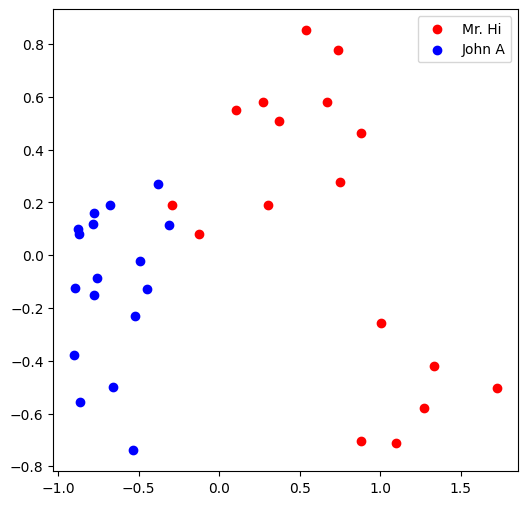

–≠–ø–æ—Ö–∞ 0: –û—à–∏–±–∫–∞ = 536.5673828125


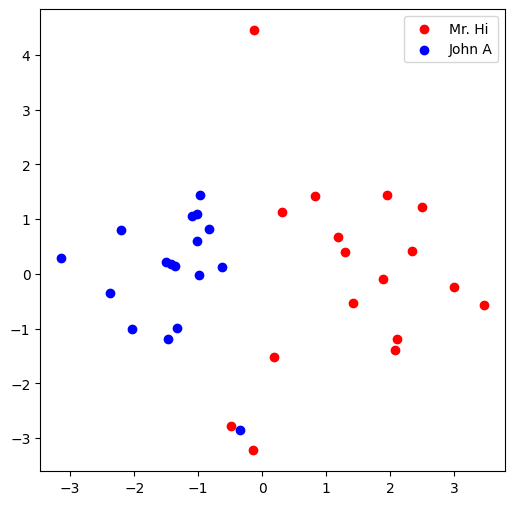

–≠–ø–æ—Ö–∞ 20: –û—à–∏–±–∫–∞ = 200.47625732421875


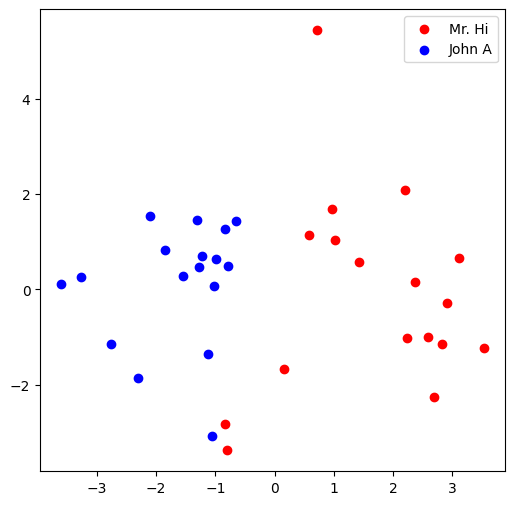

–≠–ø–æ—Ö–∞ 40: –û—à–∏–±–∫–∞ = 178.1089324951172


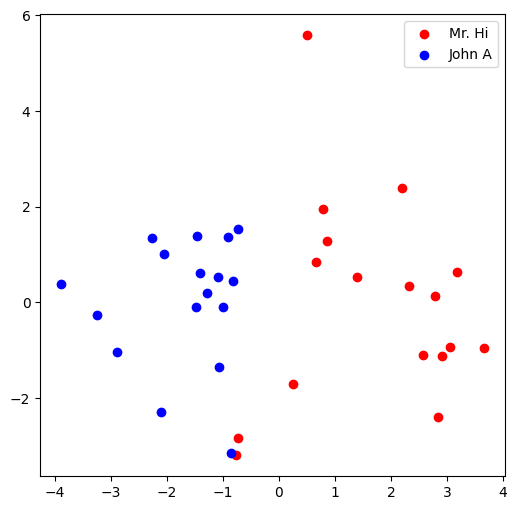

–≠–ø–æ—Ö–∞ 60: –û—à–∏–±–∫–∞ = 176.22605895996094


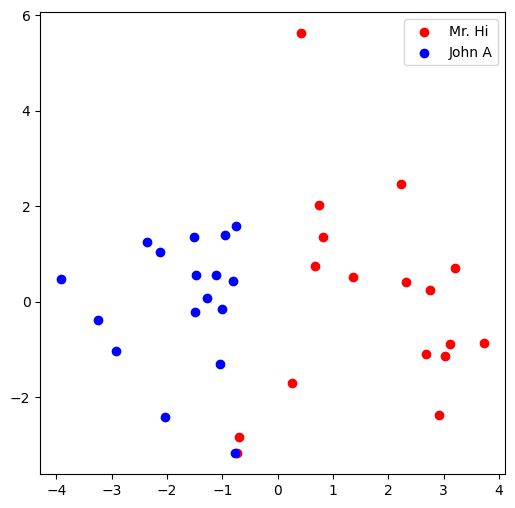

–≠–ø–æ—Ö–∞ 80: –û—à–∏–±–∫–∞ = 175.85995483398438
–≠–ø–æ—Ö–∞ 99: –û—à–∏–±–∫–∞ = 175.7784423828125


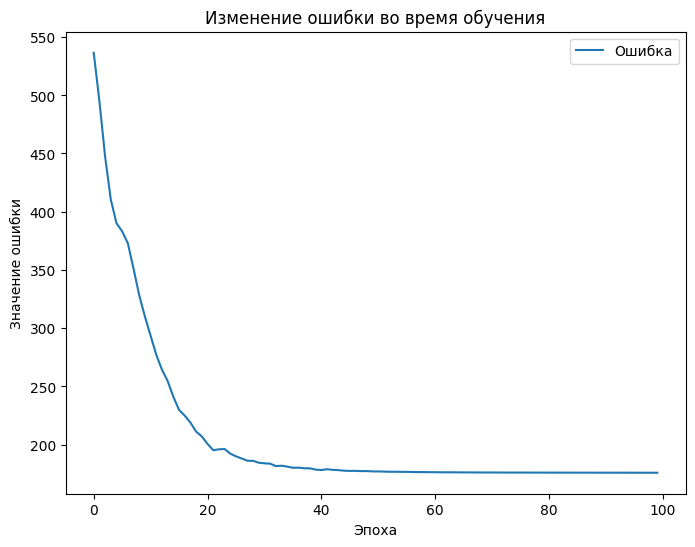

In [21]:
# –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ
train(emb, pos_nodes, neg_nodes)

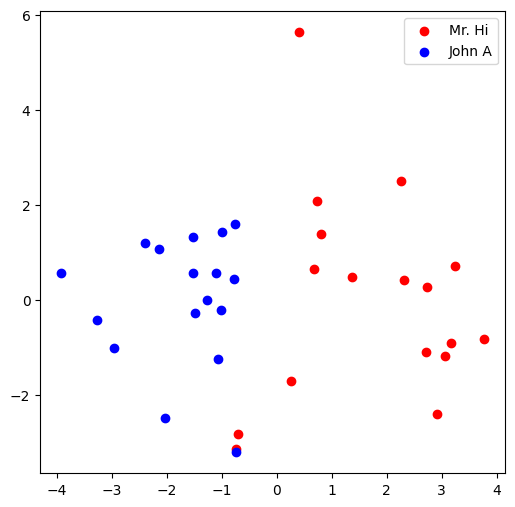

In [22]:
visualize_emb(emb)

–í —Ü–µ–ª–æ–º, –≤–∏–∑—É–∞–ª—å–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –¥–æ–≤–æ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è. –õ–æ—Å—Å –ø–æ—Å–ª–µ 40 —ç–ø–æ—Ö–∏ –ø–æ—á—Ç–∏ –Ω–µ —Å–Ω–∏–∂–∞–µ—Ç—Å—è.

# Node2Vec

In [27]:
def Node2Vec(G, num_of_paths=10, len_of_path=10, t=5, p=1, q=0.5):
    # –ü–æ–ª—É—á–∞–µ–º —á–∏—Å–ª–æ —É–∑–ª–æ–≤ –≤ –≥—Ä–∞—Ñ–µ
    num_of_nodes = G.number_of_nodes()

    # –°–æ–∑–¥–∞—ë–º —Å–ª–æ–π –¥–ª—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —É–∑–ª–æ–≤
    emb = torch.nn.Embedding(num_embeddings=num_of_nodes, embedding_dim=num_of_nodes)

    positive_nodes = []  # –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —É–∑–ª–æ–≤, –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω—ã—Ö –ø—Ä–∏ –æ–±—Ö–æ–¥–µ
    negative_nodes = []  # –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è t —Å–ª—É—á–∞–π–Ω—ã—Ö —É–∑–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏

    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º —É–∑–ª–∞–º –≥—Ä–∞—Ñ–∞
    for i in range(num_of_nodes):
        freq_table = np.zeros(num_of_nodes)  # —Å—á—ë—Ç—á–∏–∫ –ø–æ—Å–µ—â–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —É–∑–ª–∞
        encountered_nodes = []  # –≤—Ä–µ–º–µ–Ω–Ω–æ–µ —Ö—Ä–∞–Ω–∏–ª–∏—â–µ –¥–ª—è –ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö —É–∑–ª–æ–≤
        negative_sample_nodes = np.zeros(t)  # —Ö—Ä–∞–Ω–∏–ª–∏—â–µ –¥–ª—è —É–∑–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ—Å–µ—â–µ–Ω—ã

        previous_node = i  # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–π —É–∑–µ–ª
        previous_neighbors = set()  # —Ö—Ä–∞–Ω–∏–ª–∏—â–µ –¥–ª—è —Å–æ—Å–µ–¥–µ–π –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —É–∑–ª–∞

        # –ü—Ä–æ–≥–æ–Ω—è–µ–º –±–ª—É–∂–¥–∞–Ω–∏–µ num_of_paths —Ä–∞–∑ –æ—Ç —Ç–µ–∫—É—â–µ–≥–æ —É–∑–ª–∞
        for _ in range(num_of_paths):
            current_node = i  # —Å—Ç–∞—Ä—Ç—É–µ–º —Å —Ç–µ–∫—É—â–µ–≥–æ —É–∑–ª–∞
            path_nodes = set()  # –º–Ω–æ–∂–µ—Å—Ç–≤–æ –¥–ª—è —É–∑–ª–æ–≤, –ø—Ä–æ–π–¥–µ–Ω–Ω—ã—Ö –Ω–∞ –ø—É—Ç–∏
            path_nodes.add(current_node)

            # –í—ã–ø–æ–ª–Ω—è–µ–º –±–ª—É–∂–¥–∞–Ω–∏–µ –ø–æ –≥—Ä–∞—Ñ—É –Ω–∞ len_of_path —à–∞–≥–æ–≤
            for _ in range(len_of_path):
                # –§–æ—Ä–º–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ —Å–æ—Å–µ–¥–µ–π –¥–ª—è –ø–µ—Ä–µ—Ö–æ–¥–∞ —Å —É—á—ë—Ç–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ p –∏ q
                candidate_neighbors = []
                for neighbor in G.neighbors(current_node):
                    if neighbor == previous_node:
                        candidate_neighbors.extend([neighbor] * int(1 / p))
                    elif neighbor in previous_neighbors:
                        candidate_neighbors.append(neighbor)
                    else:
                        candidate_neighbors.extend([neighbor] * int(1 / q))

                # –í—ã–±–∏—Ä–∞–µ–º —Å–ª–µ–¥—É—é—â–∏–π —É–∑–µ–ª —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö —Å–æ—Å–µ–¥–µ–π
                next_node = random.choice(candidate_neighbors)

                # –û–±–Ω–æ–≤–ª—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–æ–π–¥–µ–Ω–Ω—ã—Ö —É–∑–ª–∞—Ö –∏ —Å–æ—Å–µ–¥—è—Ö
                path_nodes.add(next_node)
                previous_node = current_node
                current_node = next_node
                previous_neighbors.update(candidate_neighbors)

            # –ó–∞–ø–æ–ª–Ω—è–µ–º —Å—á—ë—Ç—á–∏–∫ –ø–æ—Å–µ—â–µ–Ω–∏–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–æ–π–¥–µ–Ω–Ω–æ–≥–æ –ø—É—Ç–∏
            for node in path_nodes:
                freq_table[node] += 1
                encountered_nodes.append(node)

        # –ù–∞—Ö–æ–¥–∏–º —É–∑–ª—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –±—ã–ª–∏ –ø–æ—Å–µ—â–µ–Ω—ã
        unvisited_nodes = [j for j, freq in enumerate(freq_table) if freq == 0]

        # –°–ª—É—á–∞–π–Ω–æ –≤—ã–±–∏—Ä–∞–µ–º t —É–∑–ª–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞ –Ω–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö
        for idx in range(t):
            negative_sample_nodes[idx] = random.choice(unvisited_nodes)

        # –û–±–Ω–æ–≤–ª—è–µ–º —Å–ª–æ–π —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —á–∞—Å—Ç–æ—Ç—ã –ø–æ—Å–µ—â–µ–Ω–∏–π
        emb.weight.data[i] = torch.Tensor(freq_table / num_of_paths)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö –∏ –Ω–µ–ø–æ—Å–µ—â—ë–Ω–Ω—ã—Ö —É–∑–ª–∞—Ö –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ —É–∑–ª–∞
        positive_nodes.append(encountered_nodes)
        negative_nodes.append(negative_sample_nodes)

    return emb, positive_nodes, np.array(negative_nodes)


In [28]:
emb_n2v, pos_nodes_n2v, neg_nodes_n2v = Node2Vec(G)

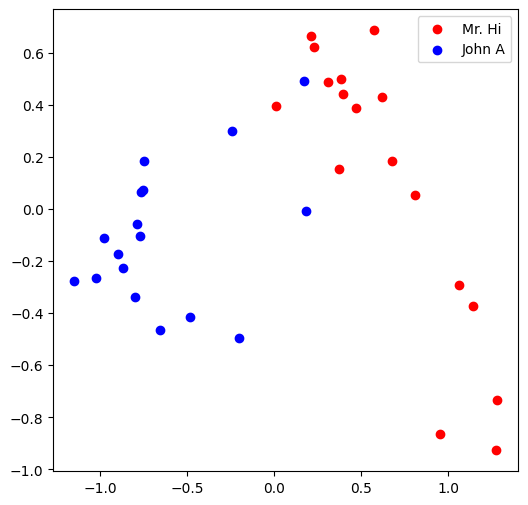

–≠–ø–æ—Ö–∞ 0: –û—à–∏–±–∫–∞ = 538.916015625


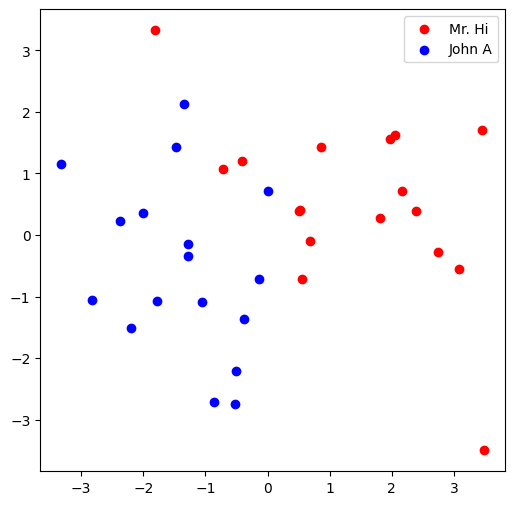

–≠–ø–æ—Ö–∞ 20: –û—à–∏–±–∫–∞ = 183.0360870361328


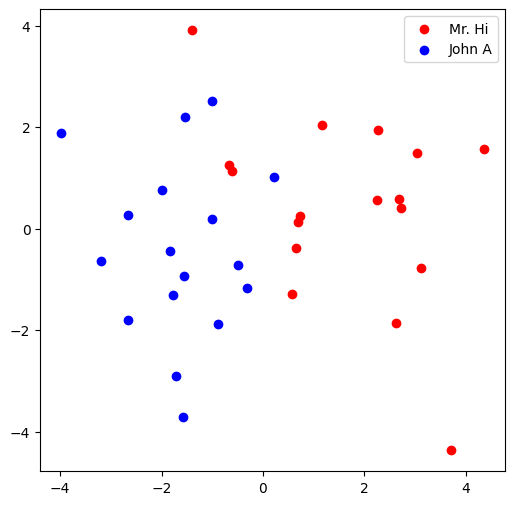

–≠–ø–æ—Ö–∞ 40: –û—à–∏–±–∫–∞ = 165.99462890625


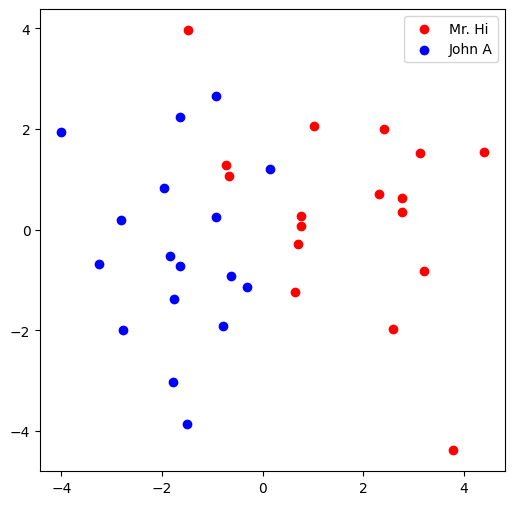

–≠–ø–æ—Ö–∞ 60: –û—à–∏–±–∫–∞ = 163.87539672851562


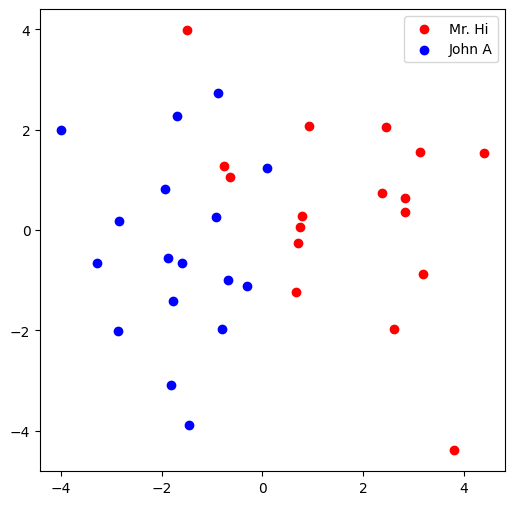

–≠–ø–æ—Ö–∞ 80: –û—à–∏–±–∫–∞ = 163.5586700439453
–≠–ø–æ—Ö–∞ 99: –û—à–∏–±–∫–∞ = 163.47695922851562


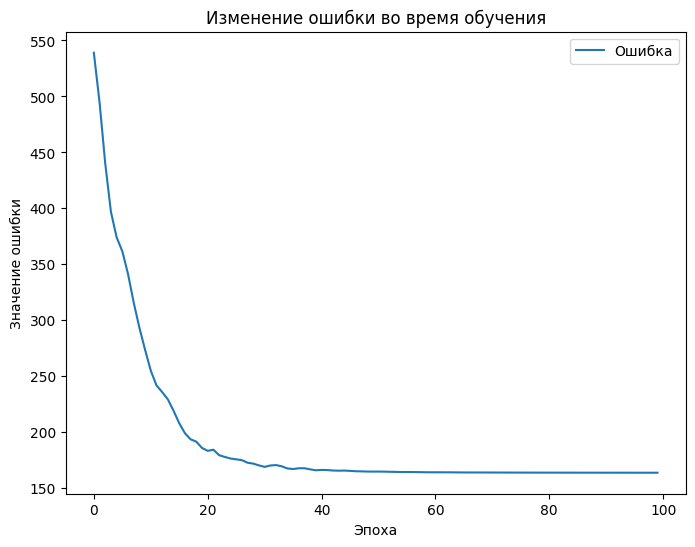

In [29]:
train(emb_n2v, pos_nodes_n2v, neg_nodes_n2v)

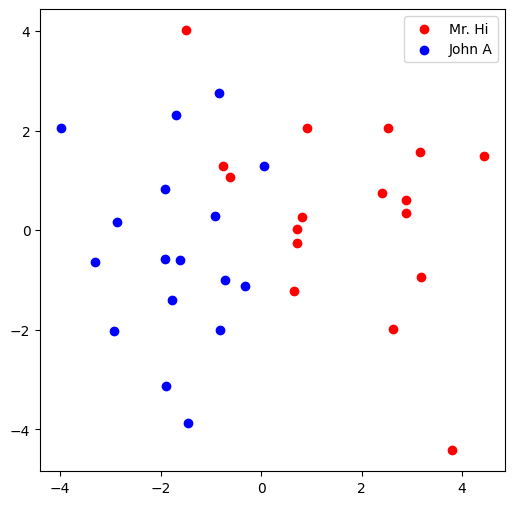

In [30]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
visualize_emb(emb_n2v)

–û—Å–Ω–æ–≤–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É Node2Vec –∏ DeepWalk –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, –∫–∞–∫ –æ–Ω–∏ –≤—ã–ø–æ–ª–Ω—è—é—Ç —Å–ª—É—á–∞–π–Ω—ã–µ –±–ª—É–∂–¥–∞–Ω–∏—è –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π —É–∑–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤–ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤. –û–±–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Å–ª—É—á–∞–π–Ω—ã–µ –±–ª—É–∂–¥–∞–Ω–∏—è, –Ω–æ Node2Vec –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ –≥–∏–±–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ –±–ª—É–∂–¥–∞–Ω–∏–π, –ø–æ–∑–≤–æ–ª—è—è –¥–æ—Å—Ç–∏–≥–∞—Ç—å –±–æ–ª—å—à–µ–≥–æ –∫–æ–Ω—Ç—Ä–æ–ª—è –Ω–∞–¥ —Ö–æ–¥–æ–º —ç—Ç–∏—Ö –±–ª—É–∂–¥–∞–Ω–∏–π.

**–û—Å–Ω–æ–≤–Ω—ã–µ –æ—Ç–ª–∏—á–∏—è**
1. *–•–∞—Ä–∞–∫—Ç–µ—Ä —Å–ª—É—á–∞–π–Ω–æ–≥–æ –±–ª—É–∂–¥–∞–Ω–∏—è*
*   DeepWalk –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –ø—Ä–æ—Å—Ç–æ–π —Å–ª—É—á–∞–π–Ω—ã–π –æ–±—Ö–æ–¥, –≥–¥–µ –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –æ–¥–∏–Ω –∏–∑ —Å–æ—Å–µ–¥–µ–π —Ç–µ–∫—É—â–µ–≥–æ —É–∑–ª–∞ —Å —Ä–∞–≤–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—É—Ç—å –Ω–µ –∏–º–µ–µ—Ç –ø–∞–º—è—Ç–∏ ‚Äî –ø–µ—Ä–µ—Ö–æ–¥ –∫ —É–∑–ª—É –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ç–æ–≥–æ, –∏–∑ –∫–∞–∫–æ–≥–æ —É–∑–ª–∞ –æ–Ω –ø—Ä–∏—à–µ–ª.
*   Node2Vec –¥–æ–±–∞–≤–ª—è–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ùëù –∏ ùëû, –∫–æ—Ç–æ—Ä—ã–µ —É–ø—Ä–∞–≤–ª—è—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –ø–µ—Ä–µ—Ö–æ–¥–∞ –∫ —Å–ª–µ–¥—É—é—â–µ–º—É —É–∑–ª—É
2. *–ü—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å*
*   Node2Vec –∑–∞ —Å—á–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —à–∞–≥–∞ –±–ª—É–∂–¥–∞–Ω–∏—è (—É—á–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ùëù –∏ ùëû –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–µ–º–Ω–æ–≥–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ, —á–µ–º DeepWalk.

________________________________________________




**–í—ã–≤–æ–¥:**

–ê–ª–≥–æ—Ä–∏—Ç–º DeepWalk –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è —Ö—É–∂–µ –ø—Ä–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤–µ—Ä—à–∏–Ω. –ö–æ–Ω–µ—á–Ω—ã–π –ª–æ—Å—Å –Ω–µ—Å–∫–æ–ª—å–Ω–æ –Ω–∏–∂–µ: 175 –ø—Ä–æ—Ç–∏–≤ 163. –¢–∞–∫–∂–µ –ø—Ä–∏ –ø–µ—Ä–≤–∏—á–Ω–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ loss —É –∞–ª–≥–æ—Ä–∏—å–º–∞ DeepWalk –±—ã–ª –Ω–µ–º–Ω–æ–≥–æ –Ω–∏–∂–µ: 536 –ø—Ä–æ—Ç–∏–≤ 538.

–ü—Ä–∏ —ç—Ç–æ–º –≤–∏–∑—É–∞–ª—å–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –∞–ª–≥–æ—Ä–∏—Ç–º–µ Node2Vec —Ä–∞–±–æ—Ç–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ.